In [102]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings("ignore")

In [103]:
#load data 
dataset=pd.read_csv("D:/GUVI PRACTICE/emp_attrition.csv")
df=pd.DataFrame(dataset)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [104]:
#DATA PREPROCESSING AND CLEANING
#drop columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [105]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [106]:

#CHECK MISSIG VALUE
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [107]:
#encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                      

In [108]:
#EDA

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


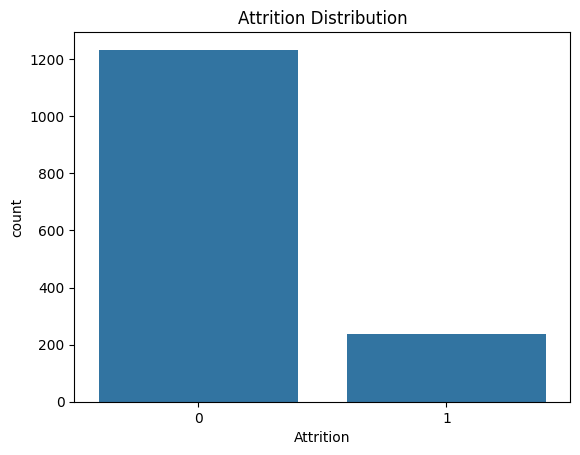

In [109]:

#ATTRITION COUNT PLOT
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

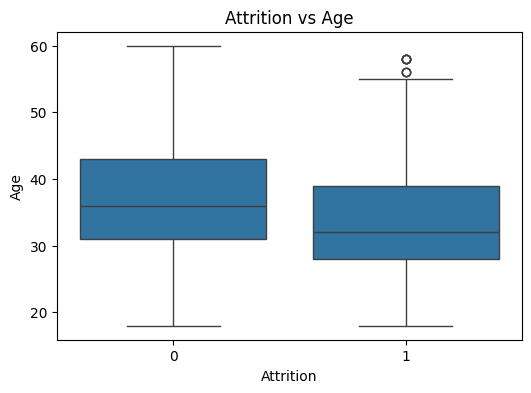

In [110]:
#attrition vs age 
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Attrition vs Age')
plt.show()

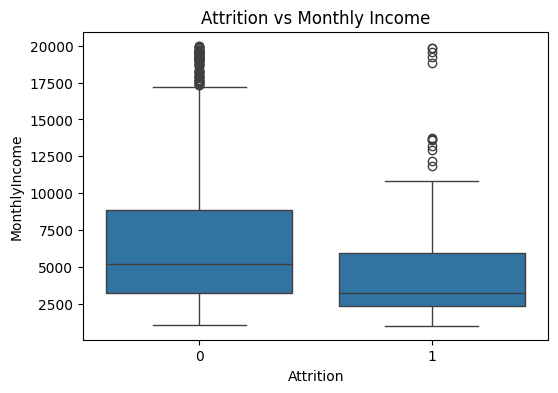

In [111]:
#attrition vs monthly income
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition vs Monthly Income')
plt.show()

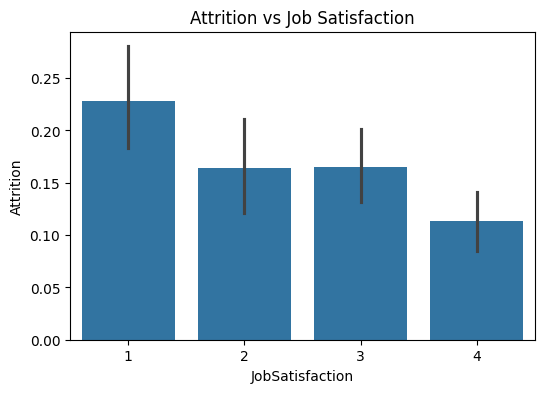

In [112]:
#attrition vs job satisfaction
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='JobSatisfaction', y='Attrition')
plt.title('Attrition vs Job Satisfaction')
plt.show()

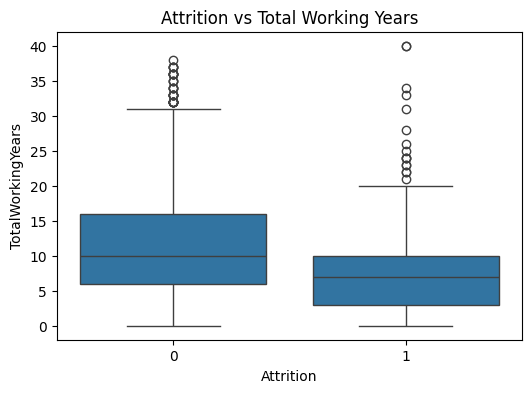

In [113]:
#attrition vs total working years 
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Attrition vs Total Working Years')
plt.show()

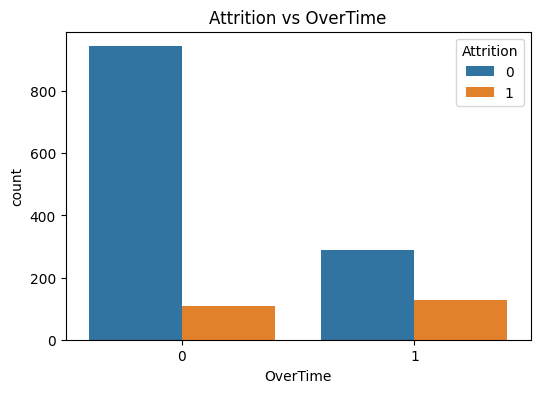

In [114]:
#attrition vs overtime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition vs OverTime')
plt.show()

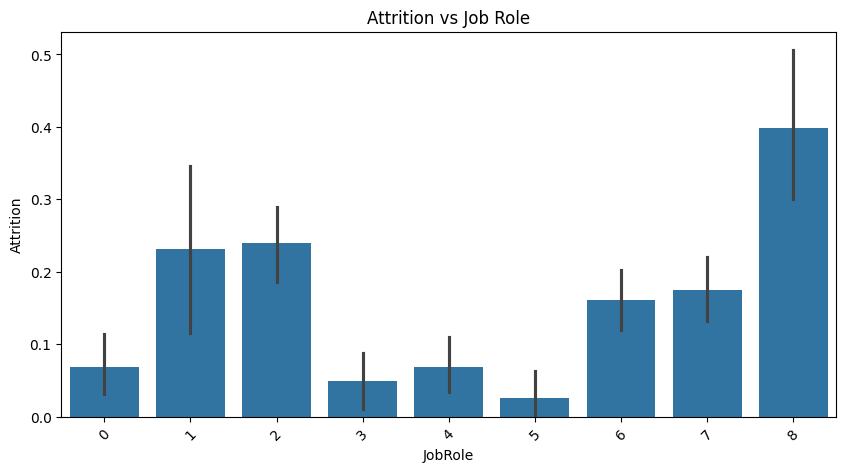

In [115]:
#Attrition vs Job Role
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='JobRole', y='Attrition')
plt.title('Attrition vs Job Role')
plt.xticks(rotation=45)
plt.show()

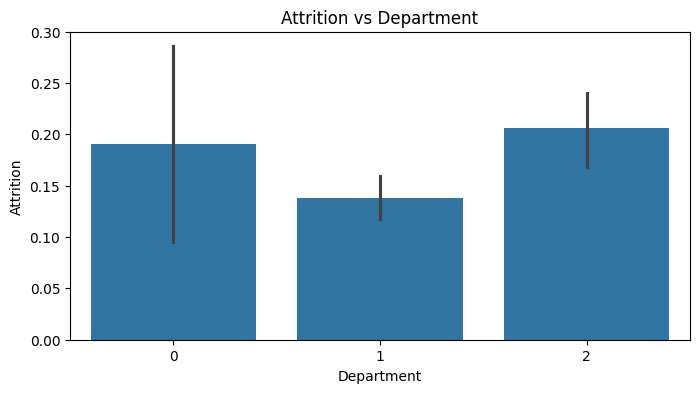

In [116]:
#Attrition vs Department
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Department', y='Attrition')
plt.title('Attrition vs Department')
plt.show()


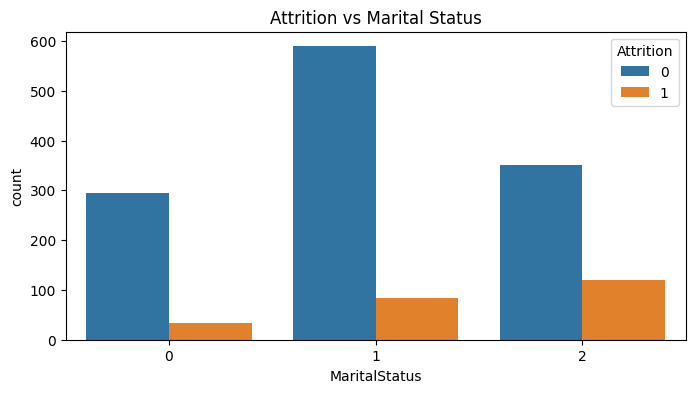

In [117]:
#Attrition vs Marital Status
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition vs Marital Status')
plt.show()

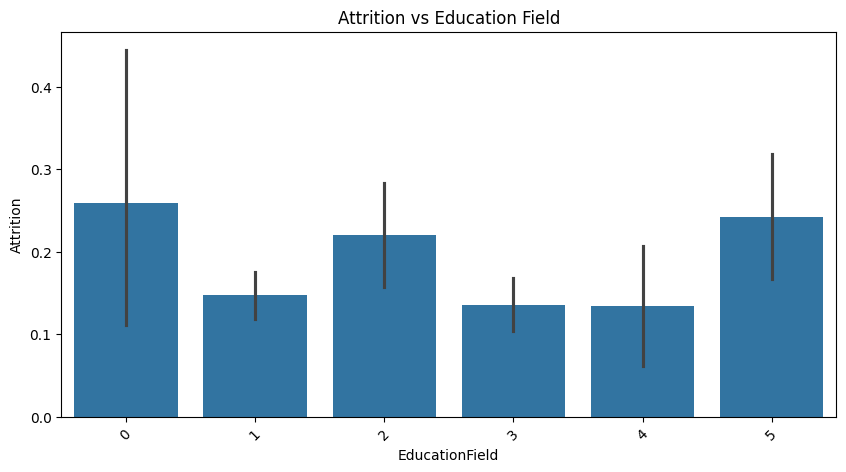

In [118]:
#Attrition vs Education Field
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='EducationField', y='Attrition')
plt.title('Attrition vs Education Field')
plt.xticks(rotation=45)
plt.show()

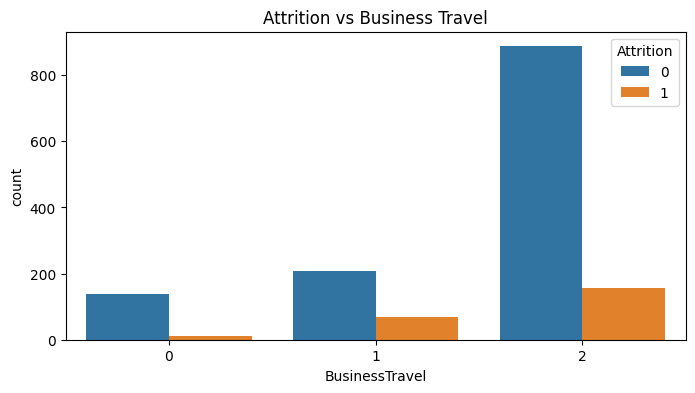

In [119]:
#Attrition vs Business Travel
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition vs Business Travel')
plt.show()

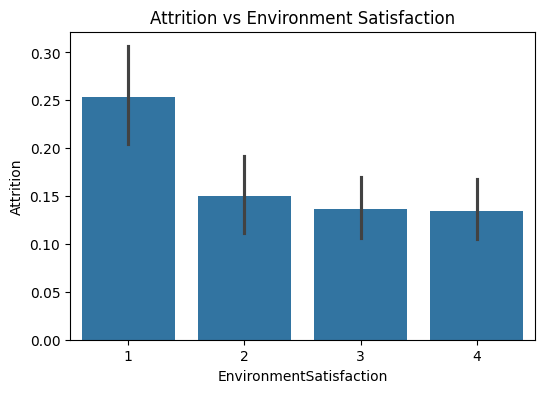

In [120]:
#Attrition vs Environment Satisfaction
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='EnvironmentSatisfaction', y='Attrition')
plt.title('Attrition vs Environment Satisfaction')
plt.show()

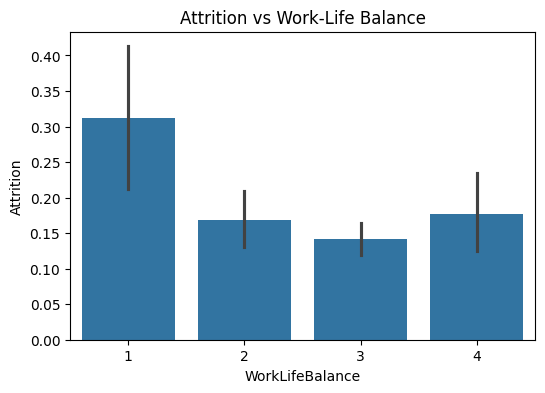

In [121]:
#Attrition vs Work-Life Balance
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='WorkLifeBalance', y='Attrition')
plt.title('Attrition vs Work-Life Balance')
plt.show()

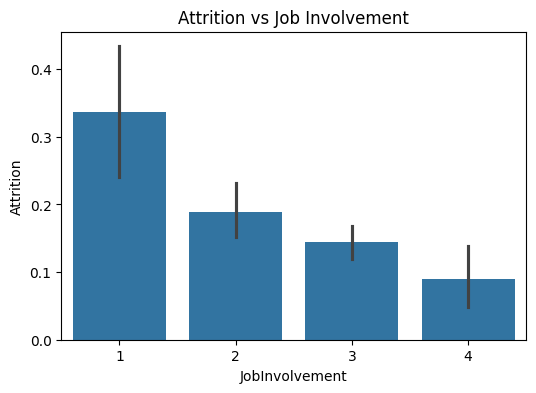

In [122]:
#Attrition vs Job Involvement
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='JobInvolvement', y='Attrition')
plt.title('Attrition vs Job Involvement')
plt.show()

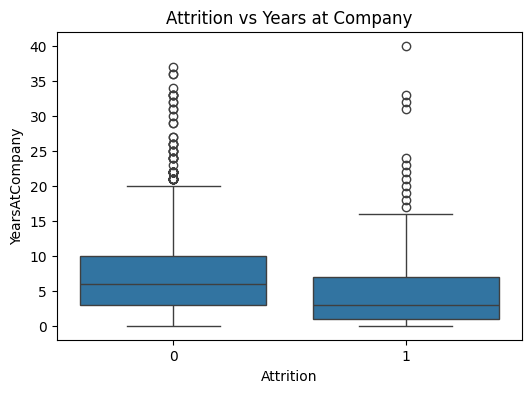

In [123]:
#Attrition vs Years at Company
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Attrition vs Years at Company')
plt.show()

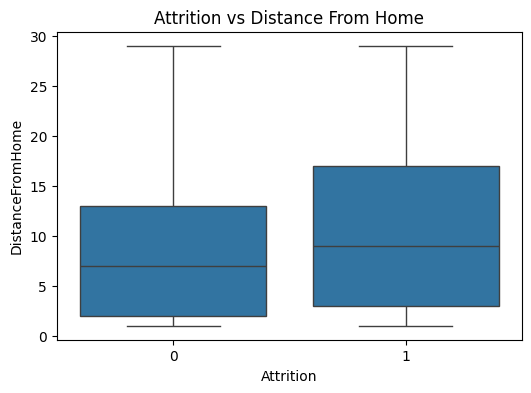

In [124]:
#Attrition vs Distance From Home
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Attrition vs Distance From Home')
plt.show()

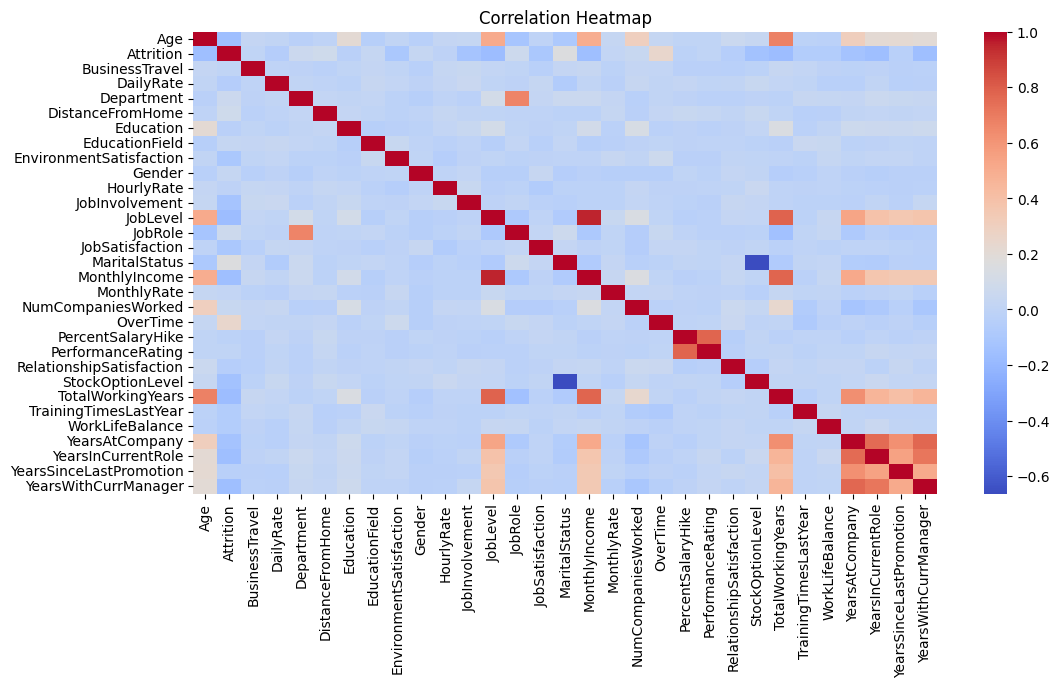

In [125]:
#CORRELATION HEATMAP
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [126]:
#FEATURE ENGINEERING
#split features and labels

X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [127]:
#train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [128]:
#standard scalar
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
#Machine Learning Model Development

#Logistic Regression (With StandardScaler)
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, y_train)

lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [130]:
#random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [131]:
#decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [132]:
#gradiant boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [133]:
#MODEL EVALUATION
def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

Accuracy: 0.564625850340136
              precision    recall  f1-score   support

           0       0.92      0.50      0.65       236
           1       0.29      0.83      0.43        58

    accuracy                           0.56       294
   macro avg       0.61      0.66      0.54       294
weighted avg       0.80      0.56      0.60       294



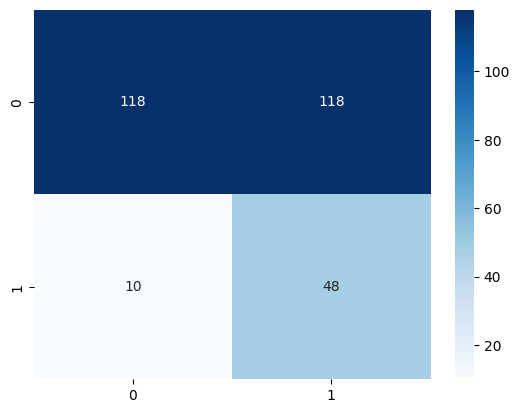

Accuracy: 0.8027210884353742
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       236
           1       0.50      0.07      0.12        58

    accuracy                           0.80       294
   macro avg       0.66      0.53      0.51       294
weighted avg       0.75      0.80      0.74       294



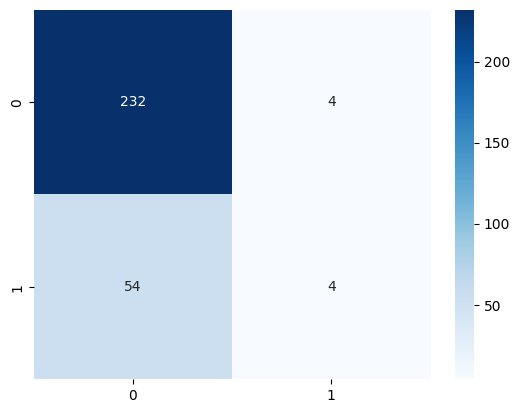

Accuracy: 0.8197278911564626
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       236
           1       0.67      0.17      0.27        58

    accuracy                           0.82       294
   macro avg       0.75      0.58      0.59       294
weighted avg       0.80      0.82      0.77       294



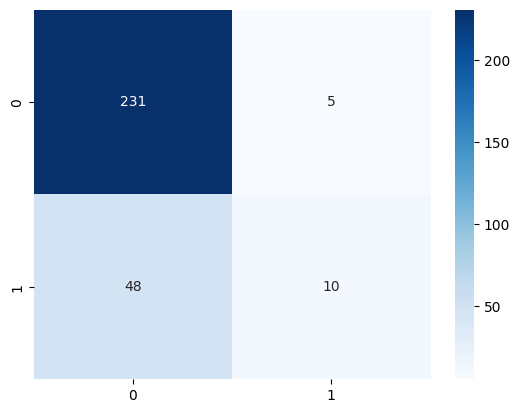

Accuracy: 0.7789115646258503
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       236
           1       0.43      0.38      0.40        58

    accuracy                           0.78       294
   macro avg       0.64      0.63      0.63       294
weighted avg       0.77      0.78      0.77       294



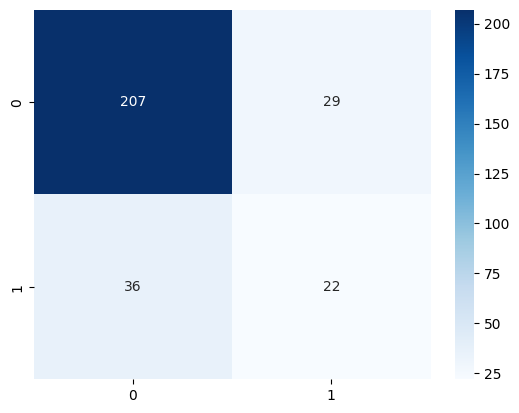

Accuracy: 0.8197278911564626
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       236
           1       0.59      0.29      0.39        58

    accuracy                           0.82       294
   macro avg       0.72      0.62      0.64       294
weighted avg       0.79      0.82      0.79       294



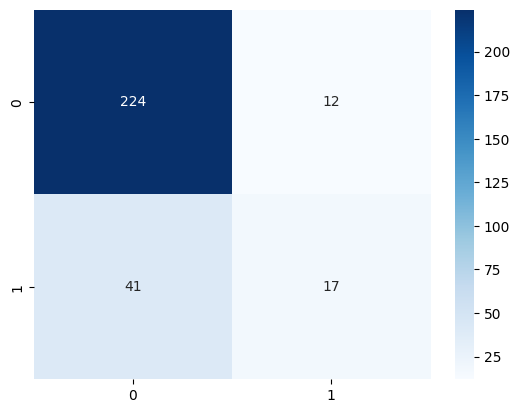

In [134]:
#evaluate each model
evaluate(lr_model, X_test_scaled, y_test)
evaluate(lr_model, X_test, y_test)
evaluate(rf_model, X_test, y_test)
evaluate(dt_model, X_test, y_test)
evaluate(gb_model, X_test, y_test)

In [135]:
from sklearn.metrics import accuracy_score

# Predictions for all models
models = {
    "LogisticRegression": lr_model,
    "RandomForestClassifier": rf_model,
    "DecisionTreeClassifier": dt_model,
    "GradientBoostingClassifier": gb_model
}

# Create empty list to store results
results = []

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Score": round(score, 4)})

# Create summary DataFrame
models_df = pd.DataFrame(results)

# Display neatly
print("Model Comparison:")
display(models_df.sort_values(by="Score", ascending=False))

Model Comparison:


,Model,Score
1,RandomForestClassifier,0.8197
3,GradientBoostingClassifier,0.8197
0,LogisticRegression,0.8027
2,DecisionTreeClassifier,0.7789


In [136]:
#save model using pickle 

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)


with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)


with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)